In [116]:
import jkutils
import os, sys, math
import numpy as np
import scipy.stats as stats
from scipy.misc import imsave
import time
from keras import backend as K
from keras.models import load_model
import math
import shelve
import itertools

ImportError: cannot import name imsave

In [109]:
if plt:
    reload(mpl)
% matplotlib notebook
if plt:
    reload(plt)
else:
    import matplotlib.pyplot as plt

In [95]:
def figsize(scale,scale_height=None):
    fig_width_pt = 360.0                          # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    if scale_height == None or type(scale_height) not in (int,float):
        scale_height = golden_mean
    height_scale = scale_height
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*height_scale              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

def savefig(filename):
    plt.savefig(os.path.join('../plots/','{}.pgf'.format(filename)))
    plt.savefig(os.path.join('../plots/','{}_pdf.pdf'.format(filename)))

In [ ]:
mpl.use('pgf')

pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "font.size": 10,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "figure.figsize": figsize(0.9),     # default fig size of 0.9 textwidth
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
    }
mpl.rcParams.update(pgf_with_latex)

import matplotlib.pyplot as plt

In [107]:
reload(mpl)
mpl.use('pgf')

pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "font.size": 10,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "figure.figsize": figsize(0.9),     # default fig size of 0.9 textwidth
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
    }
mpl.rcParams.update(pgf_with_latex)

reload(plt)

<module 'matplotlib.pyplot' from '/cvmfs/icecube.opensciencegrid.org/py2-v2/RHEL_6_x86_64/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

#visualize filters#

In [111]:
def make_visual(layer_weights):
    max_scale = layer_weights.max(axis=-1).max(axis=-1)[...,
                                                        np.newaxis, np.newaxis]
    min_scale = layer_weights.min(axis=-1).min(axis=-1)[...,
                                                        np.newaxis, np.newaxis]
    return (255 * (layer_weights - min_scale) /
            (max_scale - min_scale)).astype('uint8')


def make_mosaic(layer_weights,scale=1):
    # Dirty hack (TM)
    lw_shape = layer_weights.shape
    lw = make_visual(layer_weights)
    lw = lw.transpose(0, 2, 1, 3)
    lw = lw.reshape(lw_shape[0] * lw_shape[-2], lw_shape[1] * lw_shape[-1])
    scale=int(scale)
    return lw.repeat(scale,axis=-1).repeat(scale,axis=0)


def plot_filters(layer_weights, title=None, show=False,scale=1):
    mosaic = make_mosaic(layer_weights,scale=scale)
    print mosaic.shape
    plt.imshow(mosaic, cmap='gray')
    ax = plt.gca()
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    if title is not None:
        plt.title(title)
    if show:
        plt.show()
    return mosaic

In [112]:
projectpath='/data/user/jkager/NN_Reco/johannes/updownclassification_3/train_hist/2017-08-24/time_h012_v1'

In [113]:
model=load_model(os.path.join(projectpath, 'final_network.h5'))

In [114]:
model.weights

[conv3d_1/kernel,
 conv3d_1/bias,
 batch_normalization_1/gamma,
 batch_normalization_1/beta,
 conv3d_2/kernel,
 conv3d_2/bias,
 batch_normalization_2/gamma,
 batch_normalization_2/beta,
 dense_1/kernel,
 dense_1/bias,
 dense_2/kernel,
 dense_2/bias,
 dense_3/kernel,
 dense_3/bias,
 batch_normalization_1/moving_mean,
 batch_normalization_1/moving_variance,
 batch_normalization_2/moving_mean,
 batch_normalization_2/moving_variance]

In [15]:
print model.weights[0].get_value().shape
print model.weights[1].get_value().shape

(4, 2, 6, 1, 64)
(64,)


In [17]:
weights = model.weights[0].get_value().transpose(4,1,0,2,3).squeeze()

In [18]:
weights.shape

(64, 2, 4, 6)

(7680, 360)


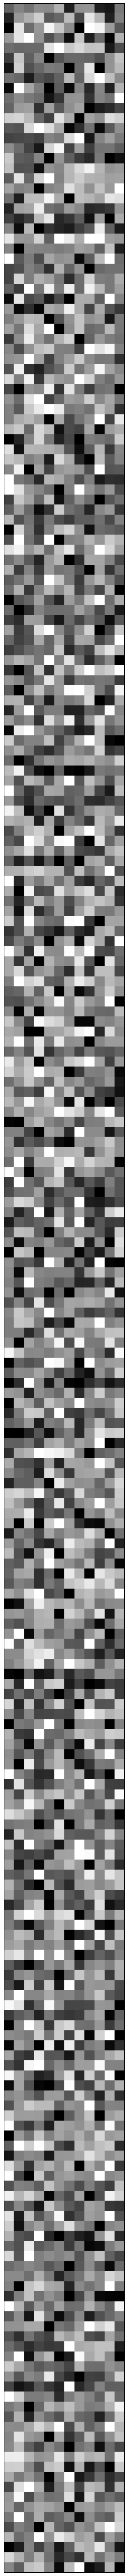

In [102]:
plt.figure(figsize=(4,256.0/12*4))
mosaic1=plot_filters(weights,scale=30)
#plt.savefig('test.png')
#plt.show()

In [103]:
mosaic1=make_mosaic(weights,scale=1)

In [104]:
mosaic1[0:4,0:6]

array([[ 99, 132, 115, 141, 138, 178],
       [ 35, 152, 175, 206,  89, 103],
       [  0, 227, 108, 151, 245, 200],
       [154, 229, 255, 147,  82, 119]], dtype=uint8)

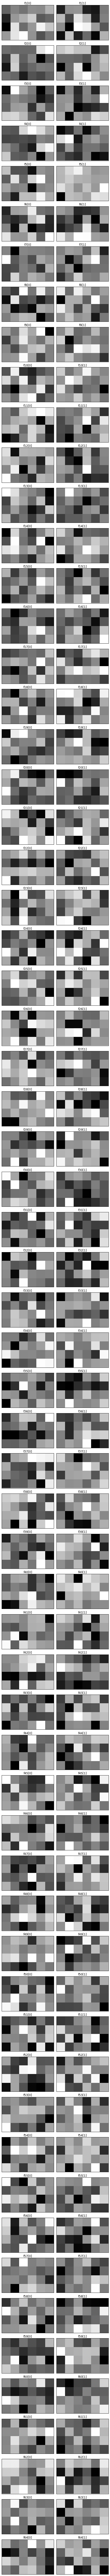

In [182]:
plt.close()
fig, axes = plt.subplots(64, 2, figsize=(8,3*64),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.1, wspace=0.05)

mosaic = make_mosaic(weights)
sh=mosaic.shape
sub_mosaics = np.array(np.split(np.array(np.split(mosaic,2,axis=-1)),64,axis=1))\
.reshape(128,4,6)
for i, (ax, grid) in enumerate(zip(axes.flat, sub_mosaics)):
    ax.imshow(grid, interpolation='none', cmap='gray',aspect='equal')
    ax.set_title("f{}[{}]".format(i/2+1,i%2))
plt.savefig('grid_64x2_conv1_filter.png')

## visualization of image with gradient ascent